<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Principal_Component_Analysis_apple6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification. 
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [3]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Hengameh1392/Health/main/applerevenue%206.csv')
df.head(25)

date    open    high     low   close  high-low  close-open  \
0   12,12,1980  0.1003  0.1007  0.1003  0.1003    0.0004      0.0000   
1   15,12,1980  0.0955  0.0955  0.0951  0.0951    0.0004     -0.0004   
2   16,12,1980  0.0885  0.0885  0.0881  0.0881    0.0004     -0.0004   
3   17,12,1980  0.0902  0.0907  0.0902  0.0902    0.0005      0.0000   
4   18,12,1980  0.0929  0.0933  0.0929  0.0929    0.0004      0.0000   
5   19,12,1980  0.0985  0.0990  0.0985  0.0985    0.0005      0.0000   
6   22,12,1980  0.1034  0.1038  0.1034  0.1034    0.0004      0.0000   
7   23,12,1980  0.1077  0.1081  0.1077  0.1077    0.0004      0.0000   
8   24,12,1980  0.1134  0.1138  0.1134  0.1134    0.0004      0.0000   
9   26,12,1980  0.1238  0.1243  0.1238  0.1238    0.0005      0.0000   
10  29,12,1980  0.1256  0.1260  0.1256  0.1256    0.0004      0.0000   
11  30,12,1980  0.1230  0.1230  0.1225  0.1225    0.0005     -0.0005   
12  31,12,1980  0.1195  0.1195  0.1191  0.1191    0.0004     -0.0004   
13    2,1,1981  0.1203  0.1212  0.1203  0.1203    0.0009      0.0000   
14    5,1,1981  0.1181  0.1181  0.1177  0.1177    0.0004     -0.0004   
15    6,1,1981  0.1129  0.1129  0.1125  0.1125    0.0004     -0.0004   
16    7,1,1981  0.1081  0.1081  0.1077  0.1077    0.0004     -0.0004   
17    8,1,1981  0.1059  0.1059  0.1055  0.1055    0.0004     -0.0004   
18    9,1,1981  0.1112  0.1116  0.1112  0.1112    0.0004      0.0000   
19   12,1,1981  0.1112  0.1112  0.1103  0.1103    0.0009     -0.0009   
20  13,01,1981  0.1068  0.1068  0.1064  0.1064    0.0004     -0.0004   
21  14,01,1981  0.1068  0.1073  0.1068  0.1068    0.0005      0.0000   
22  15,01,1981  0.1090  0.1099  0.1090  0.1090    0.0009      0.0000   
23  16,01,1981  0.1086  0.1086  0.1081  0.1081    0.0005     -0.0005   
24  19,01,1981  0.1147  0.1151  0.1147  0.1147    0.0004      0.0000   

       volume  profit or not  
0   469033600              0  
1   175884800              1  
2   105728000              1  
3    86441600              0  
4    73449600              0  
5    48630400              0  
6    37363200              0  
7    46950400              0  
8    48003200              0  
9    55574400              0  
10   93161600              0  
11   68880000              1  
12   35750400              1  
13   21660800              0  
14   35728000              1  
15   45158400              1  
16   55686400              1  
17   39827200              1  
18   21504000              0  
19   23699200              1  
20   23049600              1  
21   14291200              0  
22   14067200              0  
23   13395200              1  
24   41574400              0

In [4]:
len(df.index)

10559

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   high-low       10559 non-null  float64
 6   close-open     10559 non-null  float64
 7   volume         10559 non-null  int64  
 8   profit or not  10559 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 742.6+ KB


In [6]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

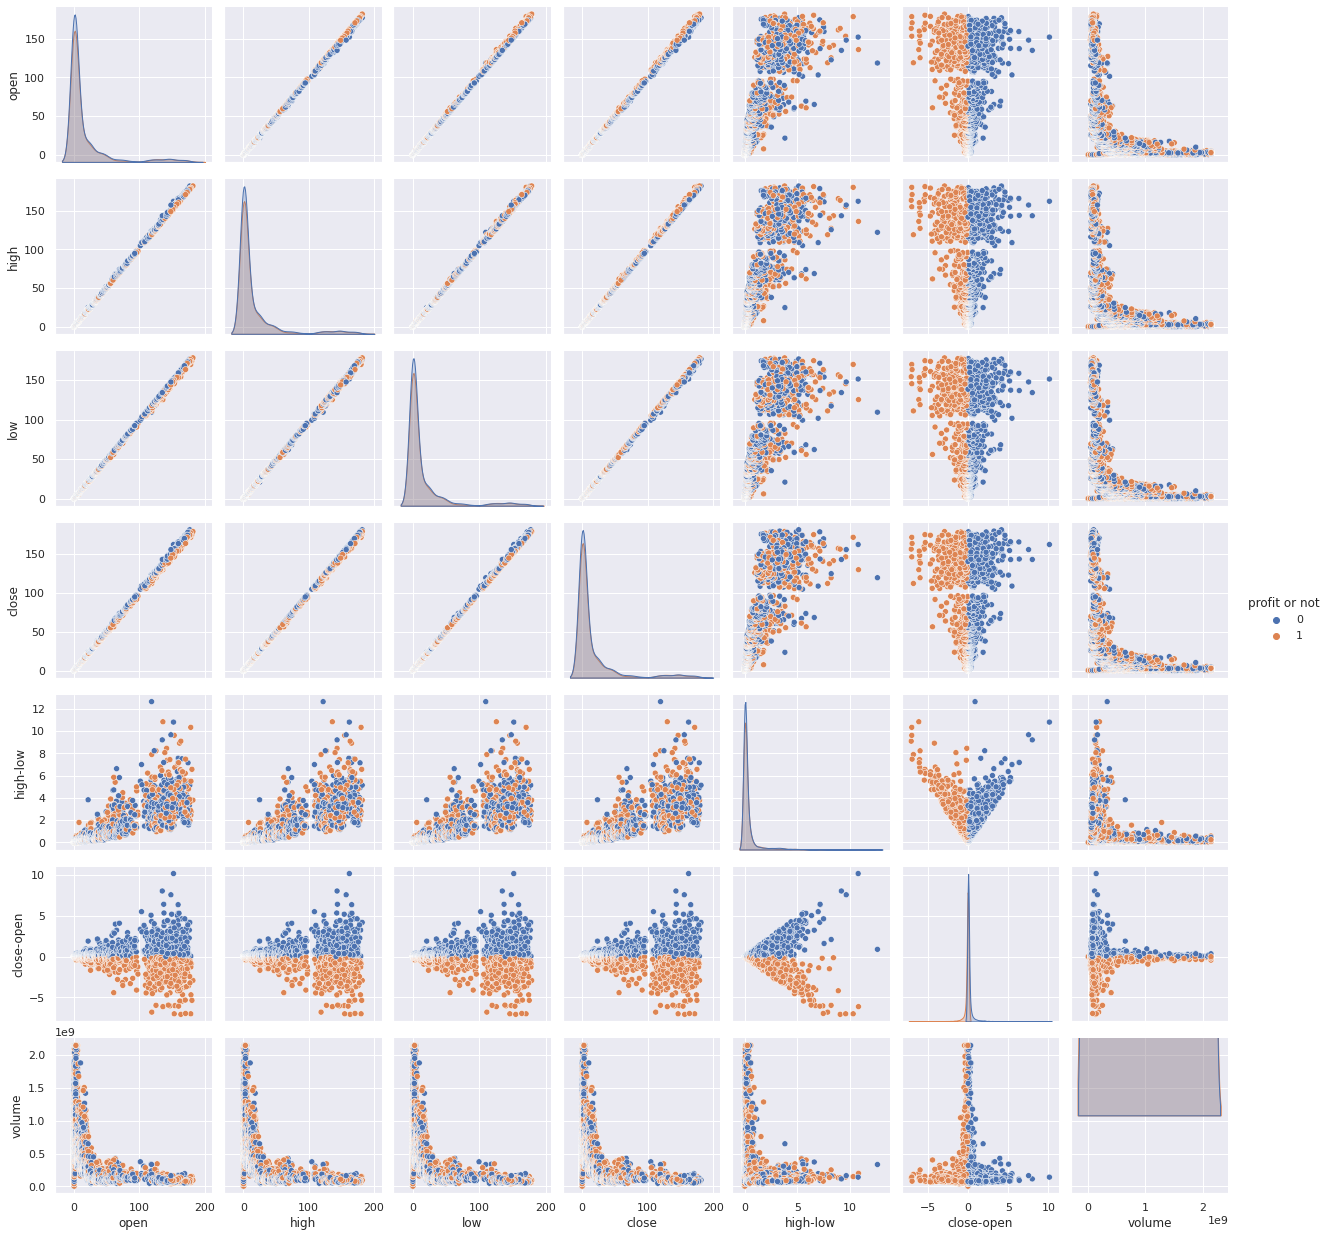

In [9]:
sns.pairplot(df, hue='profit or not')
plt.show()

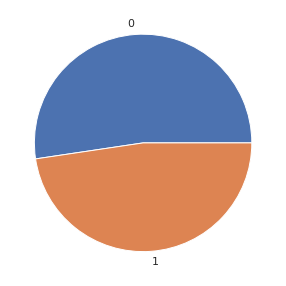

In [10]:
y =df['profit or not']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['profit or not', 'date'])
X.head(10)

open    high     low   close  high-low  close-open     volume
0  0.1003  0.1007  0.1003  0.1003    0.0004      0.0000  469033600
1  0.0955  0.0955  0.0951  0.0951    0.0004     -0.0004  175884800
2  0.0885  0.0885  0.0881  0.0881    0.0004     -0.0004  105728000
3  0.0902  0.0907  0.0902  0.0902    0.0005      0.0000   86441600
4  0.0929  0.0933  0.0929  0.0929    0.0004      0.0000   73449600
5  0.0985  0.0990  0.0985  0.0985    0.0005      0.0000   48630400
6  0.1034  0.1038  0.1034  0.1034    0.0004      0.0000   37363200
7  0.1077  0.1081  0.1077  0.1077    0.0004      0.0000   46950400
8  0.1134  0.1138  0.1134  0.1134    0.0004      0.0000   48003200
9  0.1238  0.1243  0.1238  0.1238    0.0005      0.0000   55574400

In [12]:
X.describe().transpose()

count          mean           std           min           25%  \
open        10559.0  1.530883e+01  3.397311e+01  3.880000e-02  2.368000e-01   
high        10559.0  1.548309e+01  3.438580e+01  3.880000e-02  2.425000e-01   
low         10559.0  1.513937e+01  3.358097e+01  3.840000e-02  2.316500e-01   
close       10559.0  1.531801e+01  3.400079e+01  3.840000e-02  2.369000e-01   
high-low    10559.0  3.437169e-01  9.218054e-01  0.000000e+00  7.300000e-03   
close-open  10559.0  9.184241e-03  6.009614e-01 -7.059900e+00 -8.050000e-03   
volume      10559.0  3.263275e+08  3.201156e+08  1.001504e+06  1.219792e+08   

                     50%           75%           max  
open        4.002000e-01  1.365270e+01  1.818779e+02  
high        4.066000e-01  1.378330e+01  1.821866e+02  
low         3.930000e-01  1.350400e+01  1.783824e+02  
close       3.993000e-01  1.364715e+01  1.812605e+02  
high-low    1.810000e-02  2.294000e-01  1.265730e+01  
close-open  0.000000e+00  9.600000e-03  1.013100e+01  
volume      2.159780e+08  4.074518e+08  2.147484e+09

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

open      high       low     close  high-low  close-open    volume
0 -0.447685 -0.447368 -0.447866 -0.447591 -0.372457   -0.015283  0.445817
1 -0.447826 -0.447520 -0.448021 -0.447743 -0.372457   -0.015949 -0.469986
2 -0.448032 -0.447723 -0.448230 -0.447949 -0.372457   -0.015949 -0.689157
3 -0.447982 -0.447659 -0.448167 -0.447888 -0.372349   -0.015283 -0.749408
4 -0.447903 -0.447584 -0.448087 -0.447808 -0.372457   -0.015283 -0.789995
5 -0.447738 -0.447418 -0.447920 -0.447643 -0.372349   -0.015283 -0.867531
6 -0.447594 -0.447278 -0.447774 -0.447499 -0.372457   -0.015283 -0.902730
7 -0.447467 -0.447153 -0.447646 -0.447373 -0.372457   -0.015283 -0.872779
8 -0.447299 -0.446987 -0.447476 -0.447205 -0.372457   -0.015283 -0.869490
9 -0.446993 -0.446682 -0.447166 -0.446899 -0.372349   -0.015283 -0.845838

In [14]:
X.describe().transpose()

count          mean       std        min       25%       50%  \
open        10559.0  8.613455e-17  1.000047  -0.449495 -0.443667 -0.438857   
high        10559.0  4.306727e-17  1.000047  -0.449169 -0.443244 -0.438472   
low         10559.0  0.000000e+00  1.000047  -0.449710 -0.443955 -0.439150   
close       10559.0  8.613455e-17  1.000047  -0.449411 -0.443573 -0.438796   
high-low    10559.0 -4.306727e-17  1.000047  -0.372891 -0.364972 -0.353255   
close-open  10559.0 -5.383409e-18  1.000047 -11.763516 -0.028679 -0.015283   
volume      10559.0  4.306727e-17  1.000047  -1.016325 -0.638388 -0.344734   

                 75%        max  
open       -0.048750   4.903200  
high       -0.049435   4.848264  
low        -0.048702   4.861406  
close      -0.049144   4.880779  
high-low   -0.124020  13.358749  
close-open  0.000692  16.843503  
volume      0.253434   5.689327

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

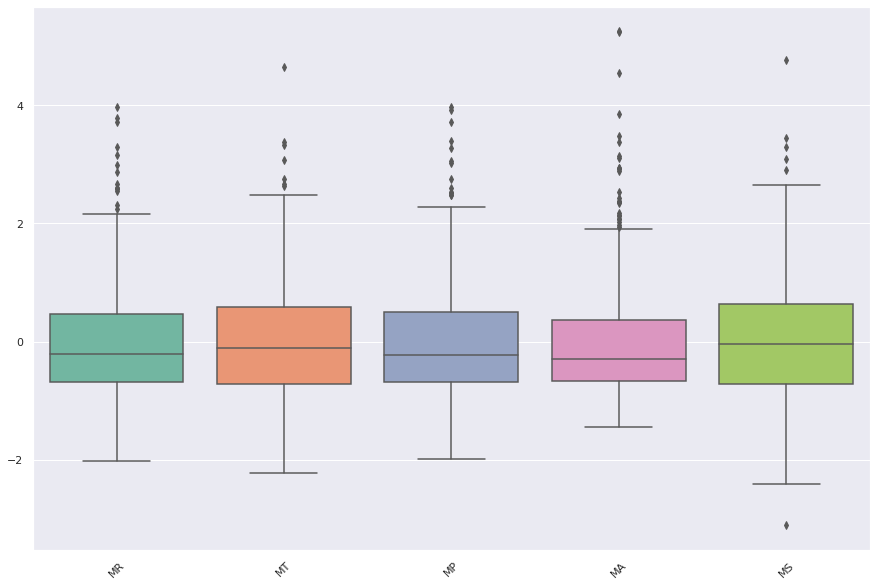

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

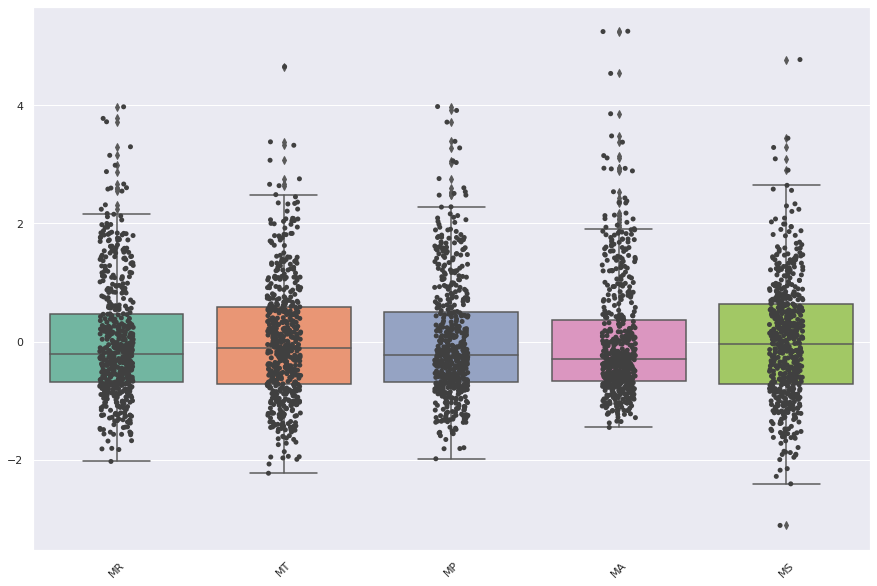

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

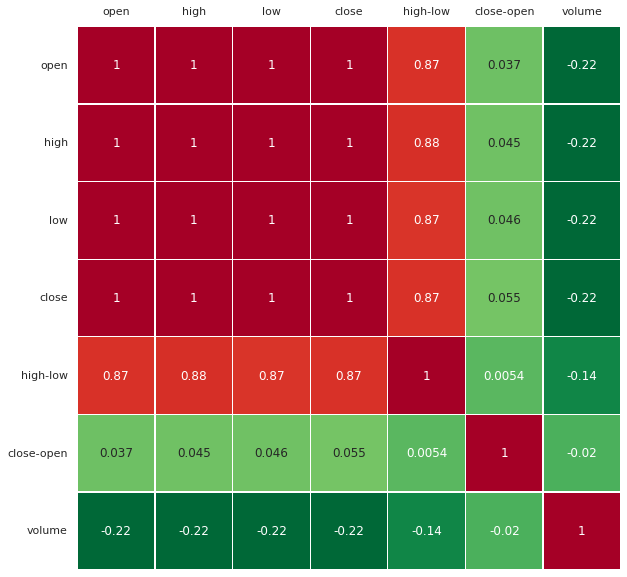

In [16]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

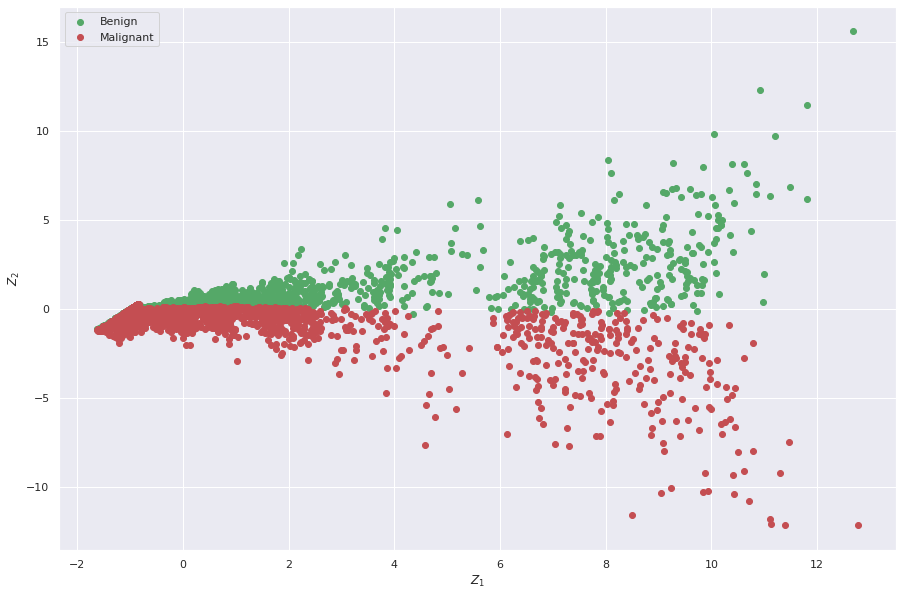

In [17]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 4.51386466e-01, -1.85552435e-02,  3.53751854e-02,
        -2.11388750e-01,  5.00454408e-01,  3.91941241e-01,
         5.88129920e-01],
       [ 4.51646943e-01, -1.10737266e-02,  3.80592131e-02,
        -1.97328526e-01, -4.93815563e-01,  5.95231995e-01,
        -3.96674202e-01],
       [ 4.51135181e-01, -9.42572539e-03,  3.61825133e-02,
        -2.26822483e-01, -5.05618277e-01, -5.81300190e-01,
         3.87389776e-01],
       [ 4.51419329e-01, -1.31402550e-03,  3.92125851e-02,
        -2.10504365e-01,  5.00040190e-01, -3.92260546e-01,
        -5.88609055e-01],
       [ 4.12973495e-01, -6.97043787e-02,  1.01596637e-01,
         9.02165851e-01, -1.17956156e-03, -1.59568223e-02,
         1.06339374e-02],
       [ 2.26477894e-02,  9.74607473e-01,  2.18739010e-01,
         4.03006467e-02, -3.87117123e-04,  6.93317564e-03,
         1.04036208e-02],
       [-1.17910580e-01, -2.11480678e-01,  9.67618034e-01,
        -7.13327213e-02, -1.88577391e-05,  1.21430643e-16,
        -5.5511151

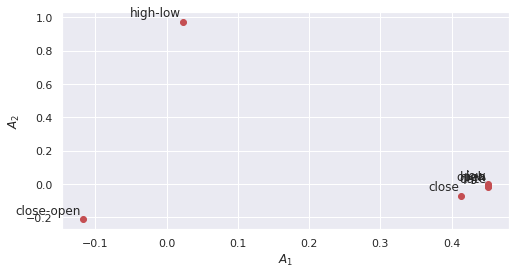

In [18]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


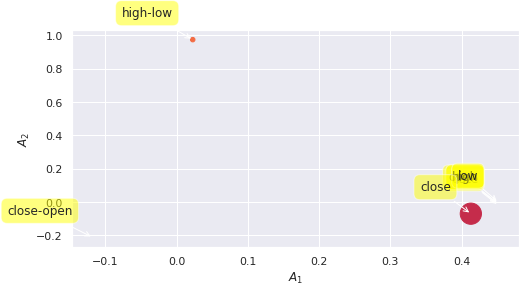

In [19]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.85865779e+00, 1.00222664e+00, 9.47085037e-01, 1.92675817e-01,
       1.77199034e-05, 1.16804578e-31, 9.14445865e-33])

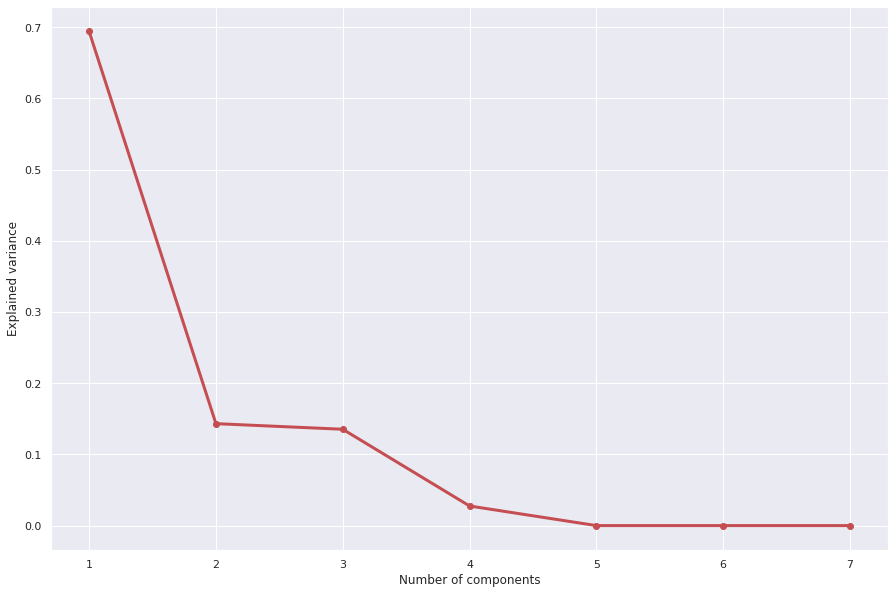

In [20]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

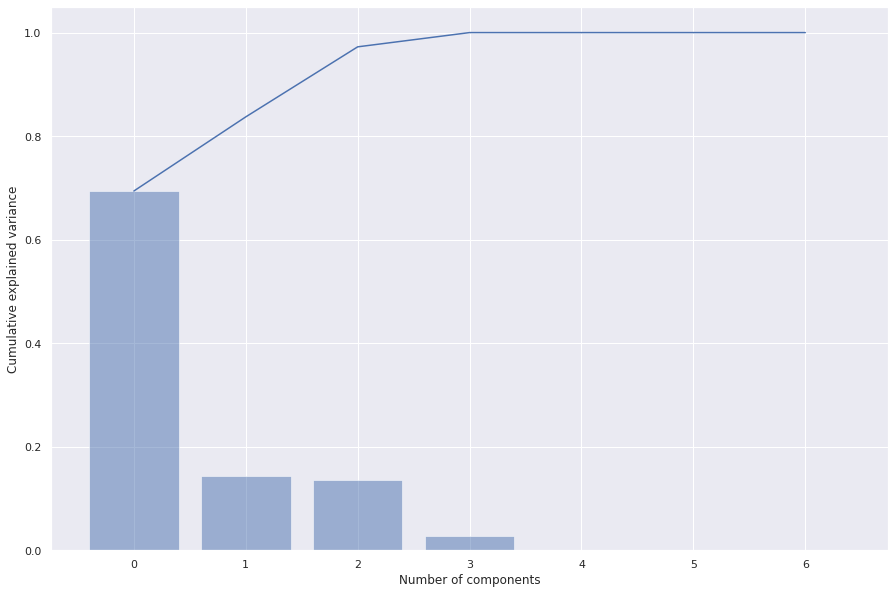

In [21]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.01936604,  0.07121906,  0.09307166, ..., -2.96078939,
       -5.7037168 , 12.14618679])

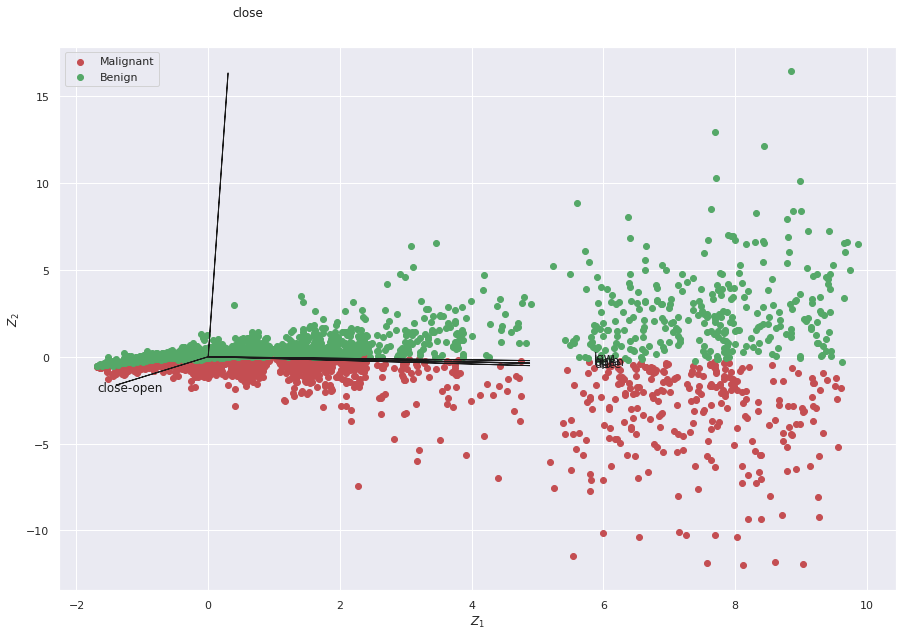

In [21]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3d247bcd97a0fc867086e407c05a9754e91d2d993269d4eb72e7c6940253621d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    1.562077  2.464472 -1.412436
1    2.801064 -0.466274 -1.600928
2    2.848768  0.593637  0.085851
3   -0.658477  2.624944  2.246609
4    2.718517  0.897870 -1.661423
..        ...       ...       ...
564  3.929944  0.550143  0.053511
565  3.322039 -0.983901  0.913880
566  1.469870 -1.784997  0.903319
567  3.865523  0.093999  1.771963
568 -2.883480 -3.328026  0.193592

[569 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f59621b57d0>)

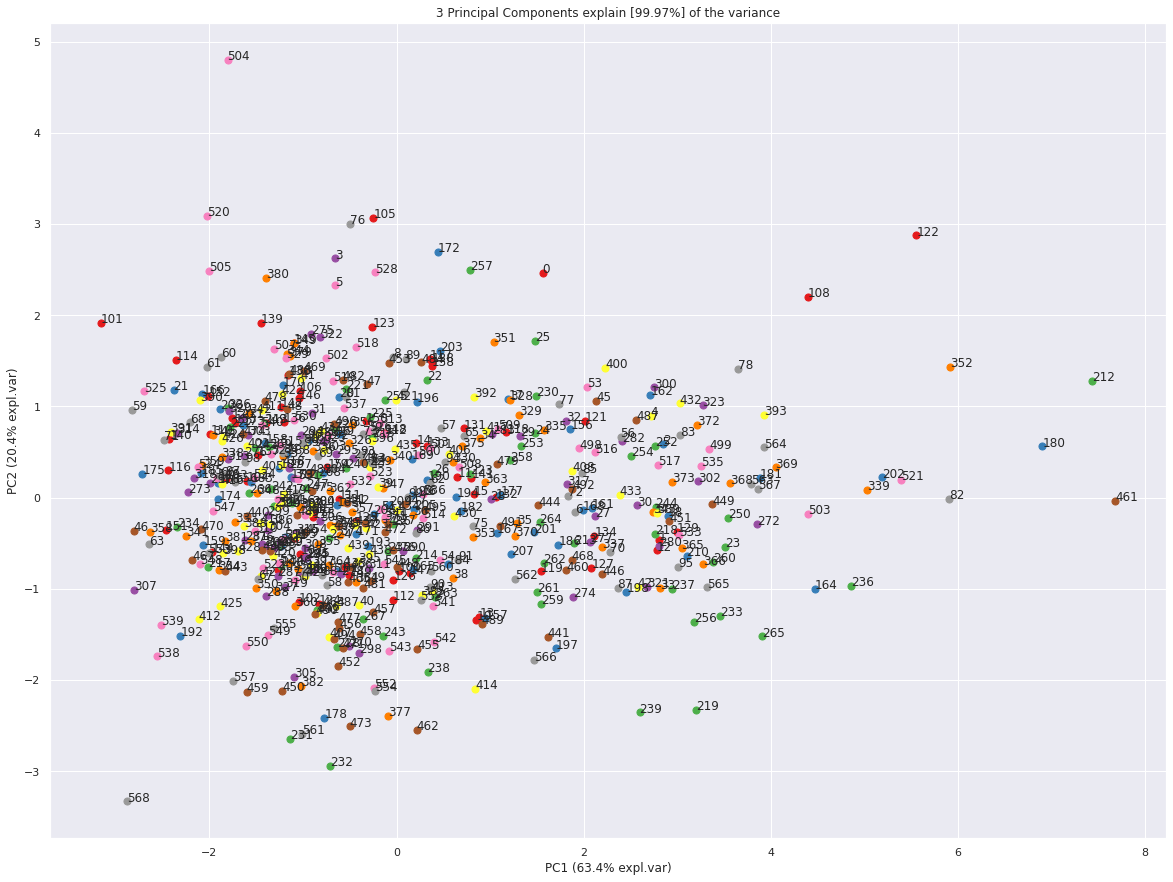

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3
MR  0.553713 -0.002694 -0.174515
MT  0.246878 -0.533564  0.808878
MP  0.555620  0.024738 -0.144385
MA  0.551790  0.003859 -0.170935
MS  0.138804  0.845385  0.514971

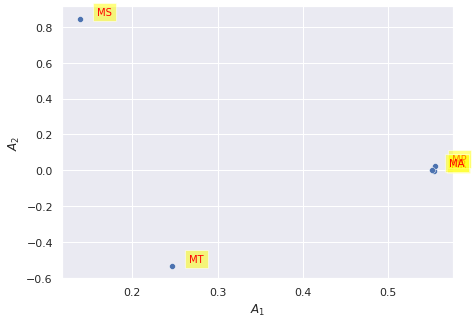

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

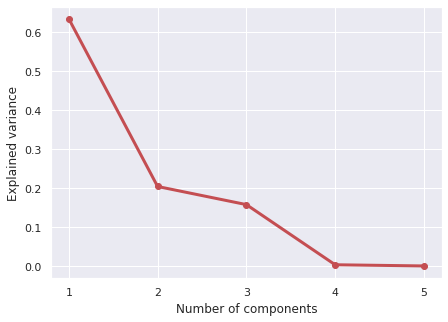

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

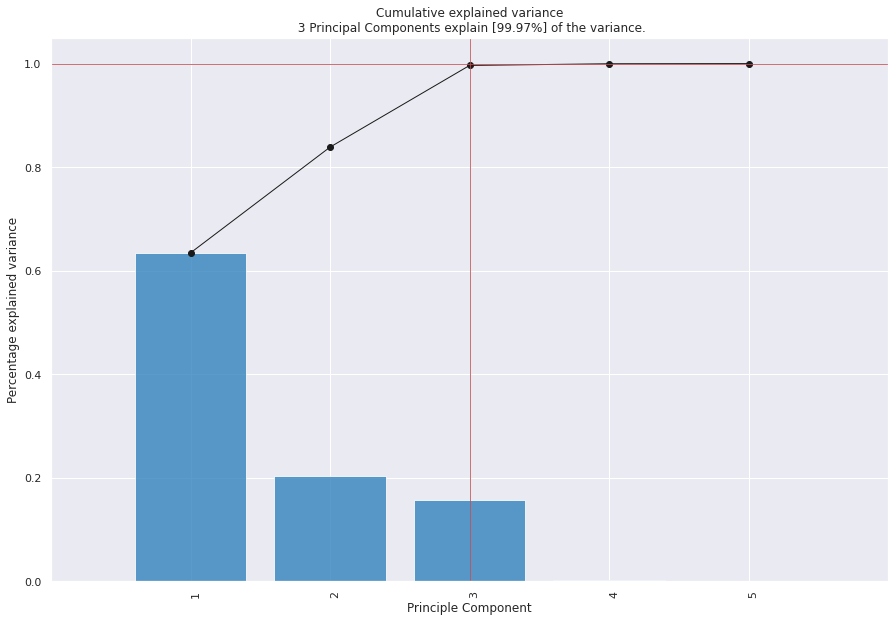

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


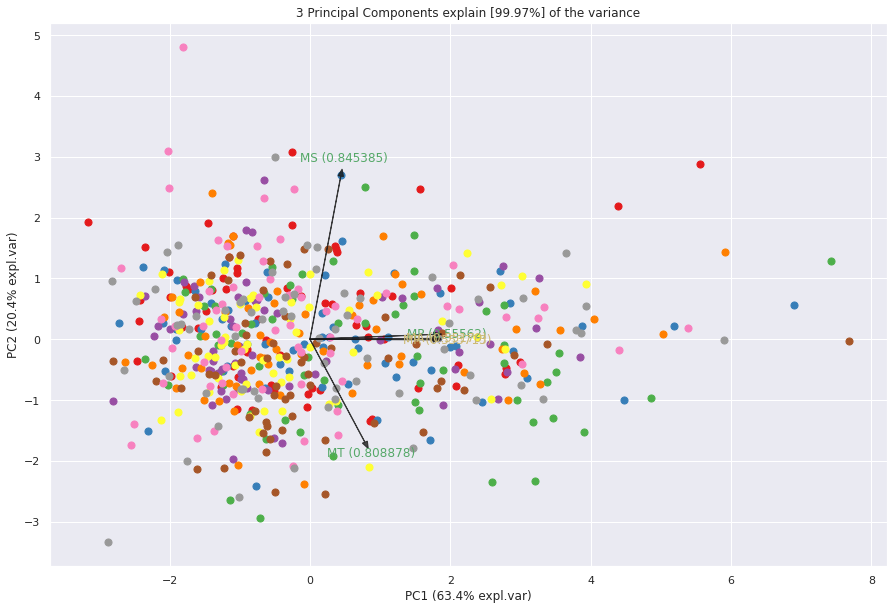

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f59623f9750>)

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


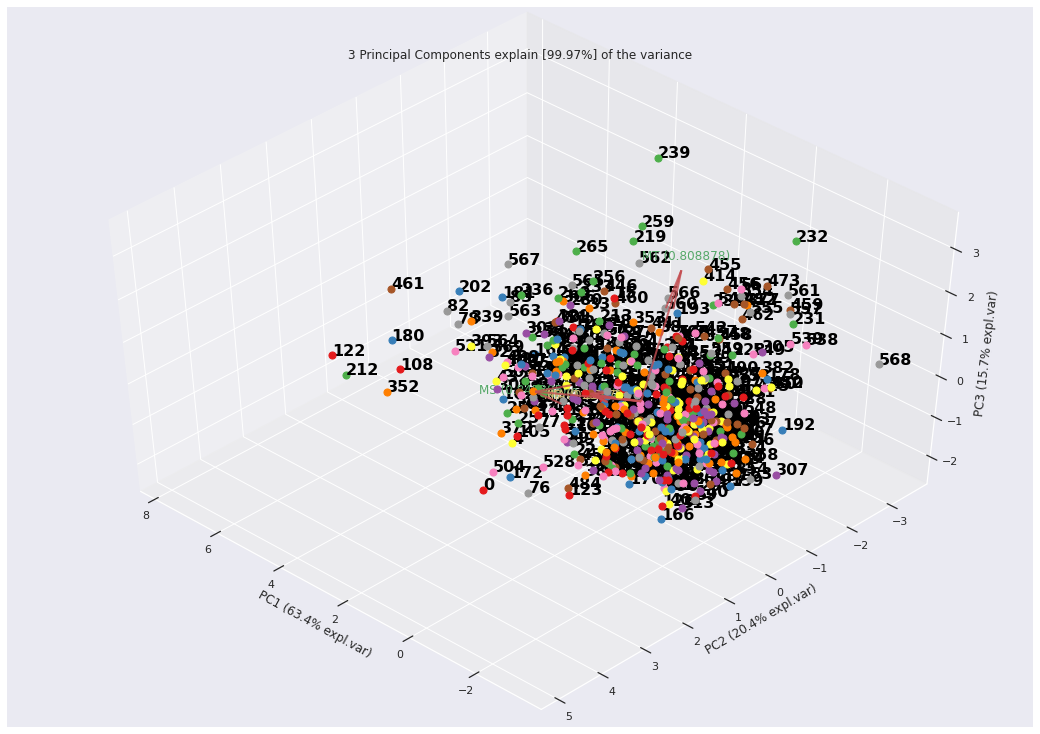

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f5962320e50>)

In [ ]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 6)
Unseen Data For Predictions: (57, 6)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (512, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 4)
12                    Transformed Test Set          (154, 4)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4537
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9329  0.9843  0.9814  0.9193   
et                 Extra Trees Classifier    0.9190  0.9769  0.9587  0.9180   
gbc          Gradient Boosting Classifier    0.9133  0.9732  0.9398  0.9216   
qda       Quadratic Discriminant Analysis    0.9131  0.9754  0.9766  0.8952   
lightgbm  Light Gradient Boosting Machine    0.9107  0.9803  0.9307  0.9263   
rf               Random Forest Classifier    0.9106  0.9772  0.9398  0.9179   
ada                  Ada Boost Classifier    0.9079  0.9683  0.9305  0.9226   
dt               Decision Tree Classifier    0.9049  0.8931  0.9491  0.9052   
lr                    Logistic Regression    0.8967  0.9692  0.9262  0.9103   
ridge                    Ridge Classifier    0.8967  0.0000  0.9494  0.8926   
nb                            Naive Bayes    0.8910  0.9661  0.9491  0.8855   
knn                K Neighbors Classifier    0.8575  0.9198  0.9117  0.8629   
svm                   SVM - Linear Kernel    0.7878  0.0000  0.8632  0.8183   
dummy                    Dummy Classifier    0.6033  0.5000  1.0000  0.6033   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9472  0.8553  0.8662     0.010  
et        0.9356  0.8262  0.8358     0.411  
gbc       0.9292  0.8170  0.8217     0.075  
qda       0.9323  0.8118  0.8244     0.011  
lightgbm  0.9267  0.8118  0.8163     0.057  
rf        0.9267  0.8113  0.8175     0.449  
ada       0.9240  0.8060  0.8127     0.081  
dt        0.9246  0.7955  0.8037     0.011  
lr        0.9158  0.7814  0.7883     0.261  
ridge     0.9173  0.7792  0.7911     0.010  
nb        0.9133  0.7661  0.7789     0.012  
knn       0.8850  0.6970  0.7046     0.112  
svm       0.8134  0.5580  0.6019     0.010  
dummy     0.7525  0.0000  0.0000     0.010

In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8333  0.9708  0.9545  0.8077  0.8750  0.6301  0.6502
1       0.8056  0.9123  0.8636  0.8261  0.8444  0.5855  0.5866
2       0.8889  0.9351  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9444  0.9935  0.9545  0.9545  0.9545  0.8831  0.8831
4       0.8889  0.9903  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9444  0.9870  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9167  0.9937  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9444  0.9873  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8857  0.9252  0.9048  0.9048  0.9048  0.7619  0.7619
9       0.9143  0.9966  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.8967  0.9692  0.9262  0.9103  0.9158  0.7814  0.7883
SD      0.0448  0.0306  0.0548  0.0608  0.0347  0.0982  0.0969

**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9708  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8333  0.9091  0.8636  0.8636  0.8636  0.6494  0.6494
2       0.8611  0.9383  0.8636  0.9048  0.8837  0.7115  0.7127
3       0.9444  0.9935  0.9091  1.0000  0.9524  0.8861  0.8919
4       0.8611  0.9903  0.7727  1.0000  0.8718  0.7256  0.7546
5       0.9444  0.9870  0.9545  0.9545  0.9545  0.8831  0.8831
6       0.9722  0.9937  0.9524  1.0000  0.9756  0.9434  0.9449
7       0.9167  0.9841  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.8857  0.9286  0.9048  0.9048  0.9048  0.7619  0.7619
9       0.9143  0.9932  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.8994  0.9689  0.9032  0.9343  0.9156  0.7905  0.7981
SD      0.0434  0.0299  0.0627  0.0607  0.0362  0.0915  0.0903

In [ ]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9708  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8333  0.8912  0.9545  0.8077  0.8750  0.6301  0.6502
2       0.7778  0.8701  0.8182  0.8182  0.8182  0.5325  0.5325
3       0.9444  0.9789  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9708  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.8333  0.8864  0.9091  0.8333  0.8696  0.6400  0.6447
6       0.8056  0.8841  0.8571  0.8182  0.8372  0.5962  0.5971
7       0.8889  0.9381  0.9048  0.9048  0.9048  0.7714  0.7714
8       0.8000  0.8418  0.8095  0.8500  0.8293  0.5882  0.5893
9       0.8857  0.9660  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8575  0.9198  0.9117  0.8629  0.8850  0.6970  0.7046
SD      0.0552  0.0479  0.0644  0.0571  0.0459  0.1159  0.1177

**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9545  1.0000  0.8462  0.9167  0.7534  0.7774
1       0.8611  0.8929  1.0000  0.8148  0.8980  0.6875  0.7237
2       0.8889  0.8896  0.9545  0.8750  0.9130  0.7600  0.7655
3       0.9167  1.0000  1.0000  0.8800  0.9362  0.8176  0.8315
4       0.9444  0.9692  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9675  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.8333  0.9143  0.9048  0.8261  0.8636  0.6505  0.6549
7       0.9444  0.9810  0.9524  0.9524  0.9524  0.8857  0.8857
8       0.8571  0.8605  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.8857  0.9660  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8937  0.9395  0.9626  0.8778  0.9165  0.7707  0.7837
SD      0.0352  0.0442  0.0409  0.0546  0.0275  0.0764  0.0737

In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  1.0000  0.8462  0.9167  0.7534  0.7774
1       0.9167  0.9448  1.0000  0.8800  0.9362  0.8176  0.8315
2       0.9167  0.9513  1.0000  0.8800  0.9362  0.8176  0.8315
3       0.9444  1.0000  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9805  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  1.0000  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9167  0.9778  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9722  0.9937  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8286  0.9286  0.9524  0.8000  0.8696  0.6250  0.6455
9       0.8857  1.0000  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.9131  0.9754  0.9766  0.8952  0.9323  0.8118  0.8244
SD      0.0374  0.0243  0.0310  0.0615  0.0273  0.0836  0.0773

**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9643  1.0000  0.8148  0.8980  0.6875  0.7237
1       0.8333  0.9318  0.8636  0.8636  0.8636  0.6494  0.6494
2       0.8889  0.9416  0.9545  0.8750  0.9130  0.7600  0.7655
3       0.9444  0.9903  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.8889  0.9805  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9167  0.9968  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.8889  0.9810  0.9524  0.8696  0.9091  0.7670  0.7722
7       0.9167  0.9841  0.9048  0.9500  0.9268  0.8302  0.8315
8       0.8857  0.9218  0.9524  0.8696  0.9091  0.7561  0.7618
9       0.8857  0.9966  1.0000  0.8400  0.9130  0.7500  0.7746
Mean    0.8910  0.9689  0.9446  0.8879  0.9125  0.7675  0.7794
SD      0.0291  0.0262  0.0605  0.0514  0.0234  0.0633  0.0615

**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (512, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (358, 3)
12                    Transformed Test Set          (154, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              dcb0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9300  0.9852  0.9535  0.9349   
knn                K Neighbors Classifier    0.9161  0.9591  0.9537  0.9155   
qda       Quadratic Discriminant Analysis    0.9160  0.9823  0.9580  0.9125   
et                 Extra Trees Classifier    0.9134  0.9708  0.9491  0.9147   
nb                            Naive Bayes    0.9133  0.9769  0.9539  0.9117   
gbc          Gradient Boosting Classifier    0.9132  0.9695  0.9351  0.9273   
svm                   SVM - Linear Kernel    0.9106  0.0000  0.9400  0.9183   
ridge                    Ridge Classifier    0.9106  0.0000  0.9907  0.8828   
rf               Random Forest Classifier    0.9106  0.9714  0.9353  0.9210   
lightgbm  Light Gradient Boosting Machine    0.9106  0.9604  0.9305  0.9263   
lda          Linear Discriminant Analysis    0.9078  0.9849  0.9861  0.8828   
ada                  Ada Boost Classifier    0.8992  0.9661  0.9076  0.9281   
dt               Decision Tree Classifier    0.8770  0.8720  0.8931  0.9043   
dummy                    Dummy Classifier    0.6033  0.5000  1.0000  0.6033   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9427  0.8523  0.8565     0.035  
knn       0.9326  0.8213  0.8277     0.141  
qda       0.9326  0.8209  0.8289     0.022  
et        0.9297  0.8164  0.8238     0.490  
nb        0.9308  0.8148  0.8213     0.019  
gbc       0.9286  0.8171  0.8241     0.108  
svm       0.9275  0.8105  0.8151     0.027  
ridge     0.9318  0.8036  0.8217     0.016  
rf        0.9265  0.8120  0.8168     0.562  
lightgbm  0.9260  0.8123  0.8190     0.053  
lda       0.9293  0.7980  0.8165     0.016  
ada       0.9159  0.7897  0.7947     0.132  
dt        0.8971  0.7434  0.7471     0.016  
dummy     0.7525  0.0000  0.0000     0.012

# **Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.8889  0.9578  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  1.0000  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9444  0.9968  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9626  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9429  0.9966  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9386  0.9852  0.9628  0.9403  0.9498  0.8701  0.8750
SD      0.0323  0.0168  0.0461  0.0463  0.0261  0.0695  0.0677

# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9610  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9903  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.8571  0.9626  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  1.0000  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9300  0.9852  0.9535  0.9349  0.9427  0.8523  0.8565
SD      0.0385  0.0158  0.0472  0.0485  0.0313  0.0817  0.0814

# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9773  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.8889  0.9578  0.9545  0.8750  0.9130  0.7600  0.7655
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9444  1.0000  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9444  0.9968  1.0000  0.9167  0.9565  0.8800  0.8864
6       0.9722  0.9968  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9626  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9429  0.9966  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9386  0.9852  0.9628  0.9403  0.9498  0.8701  0.8750
SD      0.0323  0.0168  0.0461  0.0463  0.0261  0.0695  0.0677

# **Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8611  0.9594  0.9545  0.8400  0.8936  0.6959  0.7078
1       0.8889  0.9156  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9383  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9722  0.9578  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9444  0.9968  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.9167  0.9854  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9444  0.9603  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9444  0.9714  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9269  0.9048  0.8636  0.8837  0.6988  0.7001
9       0.9429  0.9796  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9161  0.9591  0.9537  0.9155  0.9326  0.8213  0.8277
SD      0.0378  0.0246  0.0416  0.0541  0.0290  0.0827  0.0810

# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9821  0.9545  0.8750  0.9130  0.7600  0.7655
1       0.9167  0.9188  1.0000  0.8800  0.9362  0.8176  0.8315
2       0.9167  0.9334  0.9545  0.9130  0.9333  0.8224  0.8238
3       0.9722  0.9935  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       0.9167  0.9919  0.9545  0.9130  0.9333  0.8224  0.8238
6       0.9722  0.9952  1.0000  0.9545  0.9767  0.9423  0.9439
7       0.9722  0.9968  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8857  0.9524  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9714  0.9983  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9302  0.9763  0.9634  0.9287  0.9436  0.8516  0.8590
SD      0.0360  0.0285  0.0530  0.0509  0.0290  0.0771  0.0716

In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9740  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8611  0.9513  0.9545  0.8400  0.8936  0.6959  0.7078
2       0.9444  0.9643  1.0000  0.9167  0.9565  0.8800  0.8864
3       0.9722  1.0000  1.0000  0.9565  0.9778  0.9408  0.9424
4       0.9167  0.9968  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9167  0.9937  0.9524  0.9091  0.9302  0.8269  0.8283
7       0.9444  1.0000  0.9048  1.0000  0.9500  0.8879  0.8935
8       0.8571  0.9626  0.9524  0.8333  0.8889  0.6914  0.7035
9       0.9143  0.9898  0.9524  0.9091  0.9302  0.8193  0.8208
Mean    0.9160  0.9823  0.9580  0.9125  0.9326  0.8209  0.8289
SD      0.0336  0.0168  0.0435  0.0556  0.0253  0.0741  0.0714

# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9805  1.0000  0.8800  0.9362  0.8176  0.8315
1       0.8889  0.9513  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.9167  0.9643  1.0000  0.8800  0.9362  0.8176  0.8315
3       0.9444  1.0000  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9167  1.0000  0.8636  1.0000  0.9268  0.8312  0.8433
5       0.9167  0.9903  1.0000  0.8800  0.9362  0.8176  0.8315
6       0.9444  0.9968  1.0000  0.9130  0.9545  0.8835  0.8896
7       0.9722  1.0000  0.9524  1.0000  0.9756  0.9434  0.9449
8       0.8286  0.9592  0.9524  0.8000  0.8696  0.6250  0.6455
9       0.9143  0.9898  1.0000  0.8750  0.9333  0.8148  0.8292
Mean    0.9160  0.9832  0.9768  0.8991  0.9342  0.8184  0.8311
SD      0.0363  0.0176  0.0422  0.0593  0.0268  0.0809  0.0754

# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9167  0.9773  0.9545  0.9130  0.9333  0.8224  0.8238
1       0.8889  0.9448  1.0000  0.8462  0.9167  0.7534  0.7774
2       0.8889  0.9416  0.9091  0.9091  0.9091  0.7662  0.7662
3       0.9444  0.9935  1.0000  0.9167  0.9565  0.8800  0.8864
4       0.9444  0.9903  0.9091  1.0000  0.9524  0.8861  0.8919
5       0.8889  0.9870  0.9091  0.9091  0.9091  0.7662  0.7662
6       0.9444  0.9921  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.8889  0.9651  0.8571  0.9474  0.9000  0.7757  0.7806
8       0.8857  0.9269  1.0000  0.8400  0.9130  0.7500  0.7746
9       0.9429  0.9898  1.0000  0.9130  0.9545  0.8780  0.8847
Mean    0.9134  0.9708  0.9491  0.9147  0.9297  0.8164  0.8238
SD      0.0263  0.0235  0.0486  0.0448  0.0213  0.0571  0.0540

In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9444  0.9870  0.9545  0.9545  0.9545  0.8831  0.8831
1       0.8611  0.9643  0.9091  0.8696  0.8889  0.7039  0.7052
2       0.8611  0.9610  0.8636  0.9048  0.8837  0.7115  0.7127
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  1.0000  0.8182  1.0000  0.9000  0.7778  0.7977
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9444  0.9968  0.9524  0.9524  0.9524  0.8857  0.8857
7       0.9167  1.0000  0.8571  1.0000  0.9231  0.8333  0.8452
8       0.9429  0.9592  0.9524  0.9524  0.9524  0.8810  0.8810
9       0.9714  1.0000  1.0000  0.9545  0.9767  0.9398  0.9415
Mean    0.9331  0.9868  0.9307  0.9588  0.9432  0.8616  0.8652
SD      0.0483  0.0170  0.0624  0.0422  0.0408  0.1005  0.0985

In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 6.9 MB/s 


In [ ]:
import shap

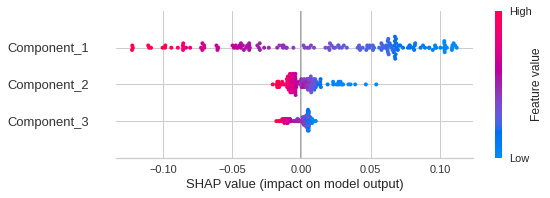

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')